In [12]:
# !pip install transformers
# !pip install torch
!pip install sentence_transformers

     |████████████████████████████████| 78 kB 3.4 MB/s 
     |████████████████████████████████| 1.2 MB 11.7 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=f98c853e92b4c20d41f559c23894260b2a58364a5d4aaf9b154d15713719fcc8
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers


In [14]:
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import numpy as np 

model = SentenceTransformer('sentence-transformers/paraphrase-MiniLM-L6-v2')


In [34]:
quotes_and_labels = [
  ('I adore ice cream', 1), 
  ('I hate ice cream', 0),
  ('I hate fucking london because of rain', 0),
  ('Jana is a dumbass', 0),
  ('I am beatiful', 1),
  ('hate hate hate you', 0),
  ('she is a very smart cute girl', 1),
  ('love love love love beautiful', 1),
  ('bad ugly smelly stupid', 0),
  ('stupid stupid bad worse the worst', 0),
  ('beautiful beautiful pretty very nice nice', 1)
  ]

quotes = [pair[0] for pair in quotes_and_labels]

embeddings = model.encode(quotes)
print(embeddings.shape)

(11, 384)


In [35]:
out_features = 2
quote_num = embeddings.shape[0]
pca = PCA(n_components=out_features)

embeddings_pca = pca.fit_transform(embeddings)


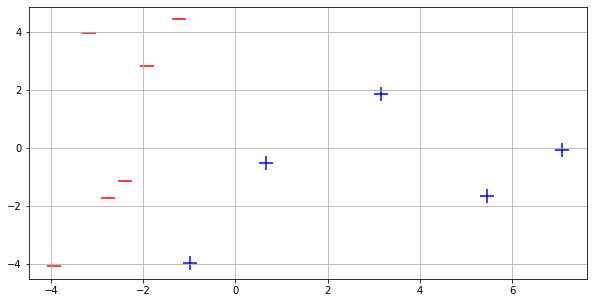

In [52]:
import matplotlib.pyplot as plt

pos_embeddings_pca = []
neg_embeddings_pca = []

for ind, (quote, label) in enumerate(quotes_and_labels):
  if label == 1:
    pos_embeddings_pca.append(list(embeddings_pca[ind, :]))
  else:
    neg_embeddings_pca.append(list(embeddings_pca[ind, :]))

pos_embeddings_pca = np.array(pos_embeddings_pca)
neg_embeddings_pca = np.array(neg_embeddings_pca)

plt.figure(figsize=(10, 5))
plt.scatter(
    pos_embeddings_pca[:, 0], pos_embeddings_pca[:, 1], 
    marker='+', s=200, c='b'
    )
plt.scatter(
    neg_embeddings_pca[:, 0], neg_embeddings_pca[:, 1], 
    marker='_', s=200, c='r'
    )

plt.grid()

